<a href="https://colab.research.google.com/github/Dhruvin3103/ML/blob/main/emp_left_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [752]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [753]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [754]:
print("max sat level",df["satisfaction_level"].max())
print("min sat level",df["satisfaction_level"].min())

max sat level 1.0
min sat level 0.09


In [755]:
print("max sat level",df["last_evaluation"].max())
print("min sat level",df["last_evaluation"].min())

max sat level 1.0
min sat level 0.36


<Axes: xlabel='left', ylabel='count'>

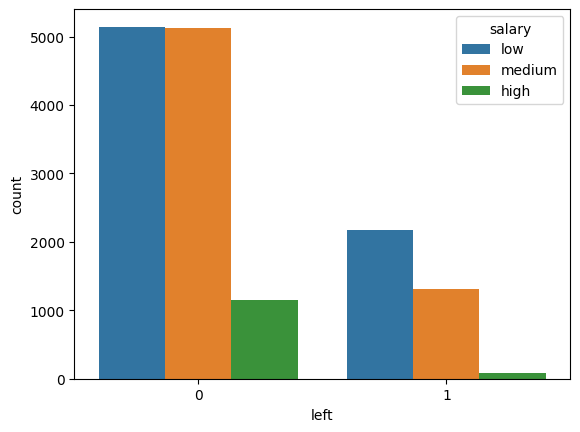

In [756]:
sns.countplot(x=df["left"],hue=df["salary"])

# Department 

<Axes: xlabel='Department', ylabel='count'>

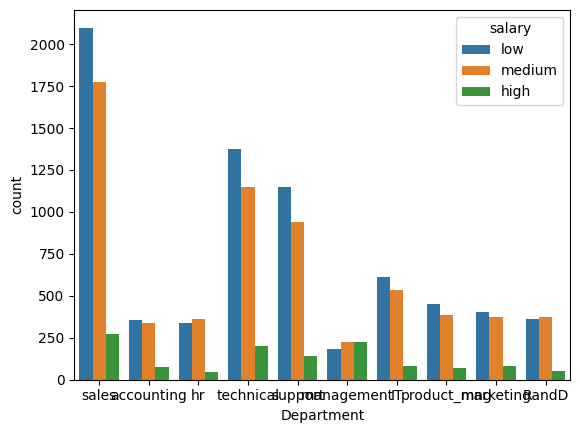

In [757]:
sns.countplot(x=df["Department"],hue=df["salary"])

In [758]:
df = pd.concat([df,pd.get_dummies(df['Department'],drop_first=True)],axis=1)
df = df.drop(["Department"],axis=1)
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0


# Number of proj

<Axes: ylabel='Frequency'>

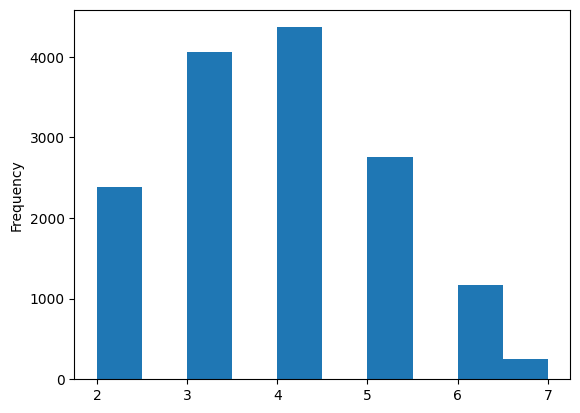

In [759]:
df["number_project"].plot.hist()

# average monthly hrs 

<Axes: ylabel='Frequency'>

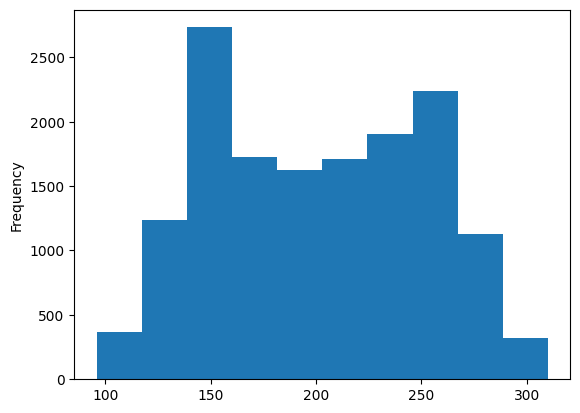

In [760]:
df["average_montly_hours"].plot.hist()

In [761]:
print(df["average_montly_hours"].max(),df["average_montly_hours"].min())

310 96


In [762]:
df3= df.copy()
# print(df3)
bin = [0,100,200,300]
label = ['less than 100','100-200','200-300']
# pd.cut(df3["average_montly_hours"],bins=bin, labels = label)
amh = pd.get_dummies(pd.cut(df3["average_montly_hours"],bins=bin, labels = label))
# print(age_cat)
df = pd.concat([df,amh],axis=1)
df = df.drop(["average_montly_hours"],axis=1)
df.head(2)

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,less than 100,100-200,200-300
0,0.38,0.53,2,3,0,1,0,low,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,6,0,1,0,medium,0,0,0,0,0,0,1,0,0,0,0,1


# visualizing promotion

<Axes: ylabel='Frequency'>

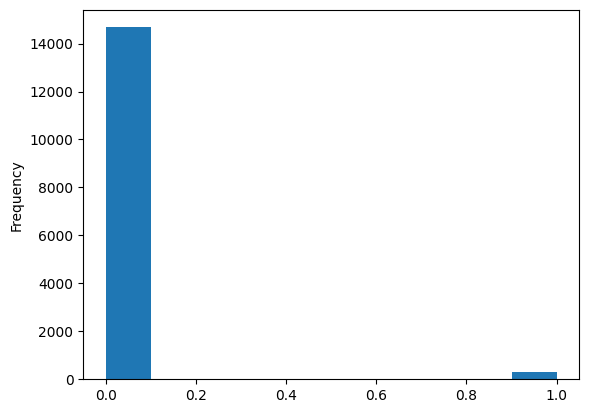

In [763]:
df["promotion_last_5years"].plot.hist()

# visualizing last evalution

<Axes: ylabel='Frequency'>

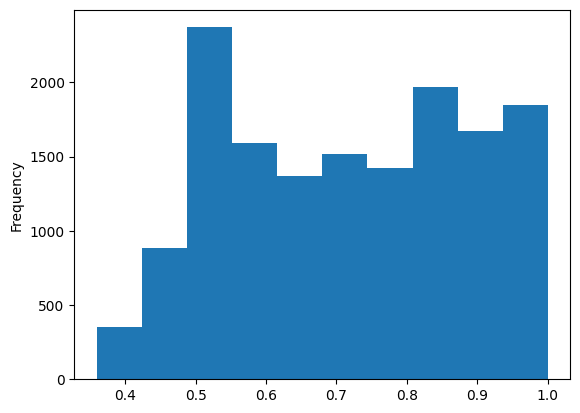

In [764]:
df["last_evaluation"].plot.hist()

In [765]:
df["last_evaluation"].min()

0.36

In [766]:
df3= df.copy()
# print(df3)
bin = [0,0.4,0.6,0.8,1.0]
label = ['less than 0.4 l ','0.4-0.6 l','0.6-0.8 l','0.8-1.0 l']
df3["l_e"] = pd.cut(df3["last_evaluation"],bins=bin, labels = label)
df3.head(3)
le_cat = pd.get_dummies(df3["l_e"])
# print(age_cat)
df = pd.concat([df,le_cat],axis=1)
df = df.drop(["last_evaluation"],axis=1)
print(df.head(2))

   satisfaction_level  number_project  time_spend_company  Work_accident  \
0                0.38               2                   3              0   
1                0.80               5                   6              0   

   left  promotion_last_5years  salary  RandD  accounting  hr  ...  sales  \
0     1                      0     low      0           0   0  ...      1   
1     1                      0  medium      0           0   0  ...      1   

   support  technical  less than 100  100-200  200-300  less than 0.4 l   \
0        0          0              0        1        0                 0   
1        0          0              0        0        1                 0   

   0.4-0.6 l  0.6-0.8 l  0.8-1.0 l  
0          1          0          0  
1          0          0          1  

[2 rows x 23 columns]


# Salary

In [767]:
df = pd.concat([df,pd.get_dummies(df['salary'],drop_first=True)],axis=1)
df = df.drop(["salary"],axis=1)
df.head(2)

,satisfaction_level,number_project,time_spend_company,Work_accident,left,promotion_last_5years,RandD,accounting,hr,management,...,technical,less than 100,100-200,200-300,less than 0.4 l,0.4-0.6 l,0.6-0.8 l,0.8-1.0 l,low,medium
0,0.38,2,3,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0.80,5,6,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


# Work accident

<Axes: ylabel='Frequency'>

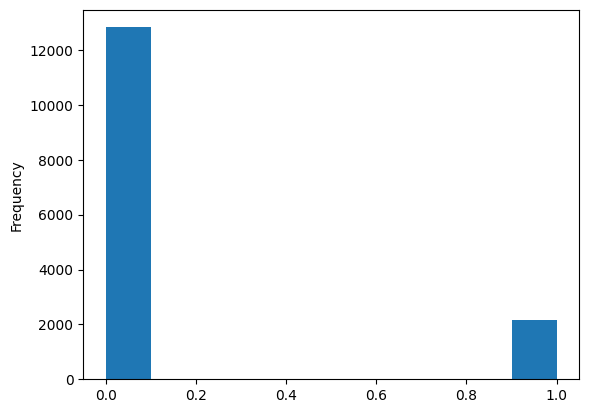

In [768]:
df["Work_accident"].plot.hist()

# Satisfaction level

<Axes: ylabel='Frequency'>

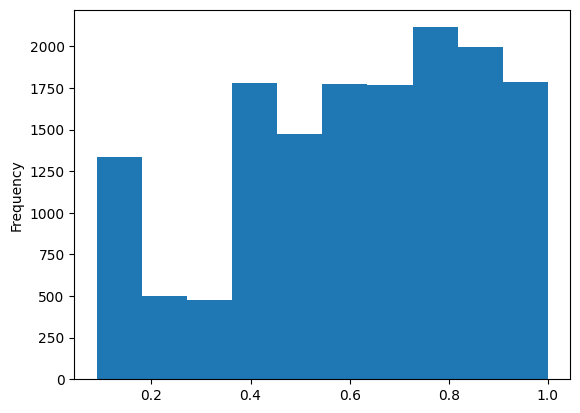

In [769]:
df["satisfaction_level"].plot.hist()

In [770]:
print(df["satisfaction_level"].max(),df["satisfaction_level"].min())

1.0 0.09


In [771]:
df3= df.copy()
# print(df3)
bin = [0,0.2,0.4,0.6,0.8,1]
label = ['< 0.2 s','0.2-0.4 s','0.4-0.6 s','0.6-0.8 s','0.8-1 s']
# pd.cut(df3["average_montly_hours"],bins=bin, labels = label)
sl = pd.get_dummies(pd.cut(df3["satisfaction_level"],bins=bin, labels = label))
# print(age_cat)
df = pd.concat([df,sl],axis=1)
df = df.drop(["satisfaction_level"],axis=1)
print(df.head(2))

   number_project  time_spend_company  Work_accident  left  \
0               2                   3              0     1   
1               5                   6              0     1   

   promotion_last_5years  RandD  accounting  hr  management  marketing  ...  \
0                      0      0           0   0           0          0  ...   
1                      0      0           0   0           0          0  ...   

   0.4-0.6 l  0.6-0.8 l  0.8-1.0 l  low  medium  < 0.2 s  0.2-0.4 s  \
0          1          0          0    1       0        0          1   
1          0          0          1    0       1        0          0   

   0.4-0.6 s  0.6-0.8 s  0.8-1 s  
0          0          0        0  
1          0          1        0  

[2 rows x 28 columns]


# Time spent

<Axes: xlabel='time_spend_company', ylabel='count'>

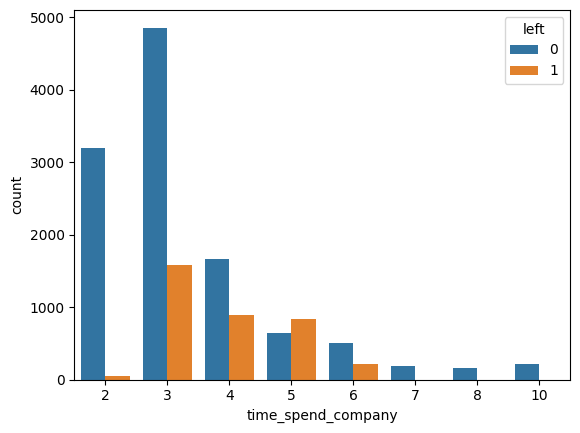

In [772]:
sns.countplot(x=df["time_spend_company"],hue=df["left"])

# Training and testing data set

In [773]:
print(df.head(2))

   number_project  time_spend_company  Work_accident  left  \
0               2                   3              0     1   
1               5                   6              0     1   

   promotion_last_5years  RandD  accounting  hr  management  marketing  ...  \
0                      0      0           0   0           0          0  ...   
1                      0      0           0   0           0          0  ...   

   0.4-0.6 l  0.6-0.8 l  0.8-1.0 l  low  medium  < 0.2 s  0.2-0.4 s  \
0          1          0          0    1       0        0          1   
1          0          0          1    0       1        0          0   

   0.4-0.6 s  0.6-0.8 s  0.8-1 s  
0          0          0        0  
1          0          1        0  

[2 rows x 28 columns]


In [774]:
X = df.drop(["left","number_project","time_spend_company"],axis=1)
X.head(2)

,Work_accident,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,...,0.4-0.6 l,0.6-0.8 l,0.8-1.0 l,low,medium,< 0.2 s,0.2-0.4 s,0.4-0.6 s,0.6-0.8 s,0.8-1 s
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [775]:
Y = df["left"]
Y.head(2)

0    1
1    1
Name: left, dtype: int64

In [776]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7)
Y_train.shape

(10499,)

Model using logistic regression

In [777]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=15000)
log.fit(X_train,Y_train)

LogisticRegression(max_iter=15000)

In [778]:
log.score(X_test,Y_test)

0.8122222222222222

Performed reguraization but had some error : (

In [783]:
from sklearn.linear_model import Lasso
lo = Lasso(alpha=5,max_iter=15000,tol=0.01)
lo.fit(X_train,Y_train)
print(lo.score(X_test,Y_test))
print(lo.score(X_train,Y_train))

-0.0019677274954088553
0.0


In [784]:
from sklearn.linear_model import Ridge
rd = Ridge(alpha=5,max_iter=15000,tol=0.01)
rd.fit(X_train,Y_train)
print(rd.score(X_test,Y_test))
print(rd.score(X_train,Y_train))

0.285137815993148
0.27456496701603483
